In [2]:
%matplotlib widget

In [3]:
from qiskit import QuantumCircuit
from weylchamber import c1c2c3, WeylChamber
from qiskit.quantum_info import Operator
import numpy as np
from qiskit import transpile

In [18]:
from virtual_swap.cns_transform import cx_replace

cx_replace.draw()

┌──────────┐            ┌────────┐┌───┐
q_0: ┤ Rz(-π/2) ├────────────┤0       ├┤ H ├
     └──┬───┬───┘┌──────────┐│  Iswap │└───┘
q_1: ───┤ H ├────┤ Rz(-π/2) ├┤1       ├─────
        └───┘    └──────────┘└────────┘

In [26]:
transpile(cx_replace, basis_gates=["u", "cx"]).draw()

global phase: π/2
     ┌─────────────┐     ┌───┐┌────────────┐
q_0: ┤ U(π/2,0,-π) ├──■──┤ X ├┤ U(π/2,0,π) ├
     ├─────────────┤┌─┴─┐└─┬─┘├────────────┤
q_1: ┤ U(π/2,0,-π) ├┤ X ├──■──┤ U(π/2,0,π) ├
     └─────────────┘└───┘     └────────────┘

In [21]:
qc3 = QuantumCircuit(2)
qc3.cx(1, 0)
qc3.cx(0, 1)
qc3.draw()

┌───┐     
q_0: ┤ X ├──■──
     └─┬─┘┌─┴─┐
q_1: ──■──┤ X ├
          └───┘

In [20]:
Operator(qc3).equiv(cx_replace)

True

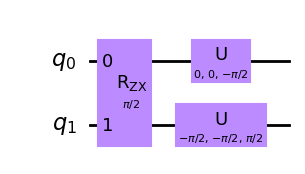

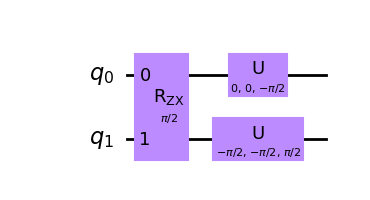

In [4]:
qc = QuantumCircuit(2)
qc.cx(0, 1)
qc.swap(0, 1)
# transpile into CR gates
transpile(qc, basis_gates=["rzx", "u"], optimization_level=3).draw("mpl")

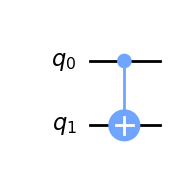

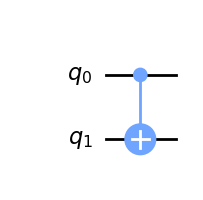

In [5]:
qc = QuantumCircuit(2)
qc.cx(0, 1)
qc.draw("mpl")

In [6]:
from slam.utils.transpiler_pass.weyl_decompose import RootiSwapWeylDecomposition
from qiskit.transpiler import PassManager
pm = PassManager()
pm.append(RootiSwapWeylDecomposition())s
qc = pm.run(qc)
qc.draw('mpl')

SyntaxError: invalid syntax (1341780224.py, line 4)

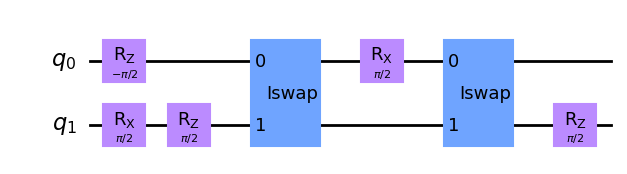

In [ ]:
qc1 = QuantumCircuit(2)
qc1.rx(np.pi / 2, 1)
qc1.rz(-np.pi / 2, 0)
qc1.rz(np.pi / 2, 1)
qc1.iswap(0, 1)
qc1.rx(np.pi / 2, 0)
qc1.iswap(0, 1)
qc1.rz(np.pi / 2, 1)
qc1.draw("mpl")

In [ ]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.cx(1, 0)
qc.h(1)
qc.cx(0, 1)
qc.tdg(1)

qc2 = QuantumCircuit(2)
qc2.s(0)
qc2.cx(1, 0)
qc2.sx(1)
qc2.sdg(0)
qc2.t(1)

qc3 = QuantumCircuit(2)
qc3.cx(1, 0)
qc3.cx(0, 1)

qc4 = QuantumCircuit(2)
qc4.cx(0, 1)
qc4.swap(0, 1)

c1 = c1c2c3(Operator(qc).data)
c2 = c1c2c3(Operator(qc2).data)
c3 = c1c2c3(Operator(qc3).data)
c4 = c1c2c3(Operator(qc4).data)
print(c1, c2, c3, c4)

(0.5, 0.0, 0.0) (0.5, 0.0, 0.0) (0.5, 0.5, 0.0) (0.5, 0.5, 0.0)


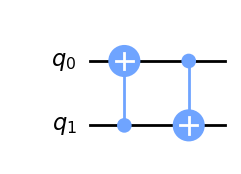

In [ ]:
qc3.draw("mpl")

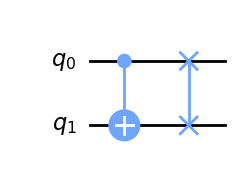

In [ ]:
qc4.draw("mpl")

In [ ]:
Operator(qc4).equiv(cx_replace)

True

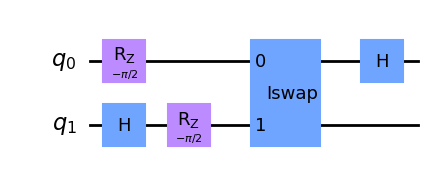

In [ ]:
from virtual_swap.cns_transform import cx_replace, iswap_replace

cx_replace.draw("mpl")

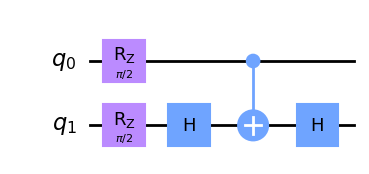

In [ ]:
iswap_replace.draw("mpl")

In [ ]:
Operator(qc3).equiv(qc4)

True

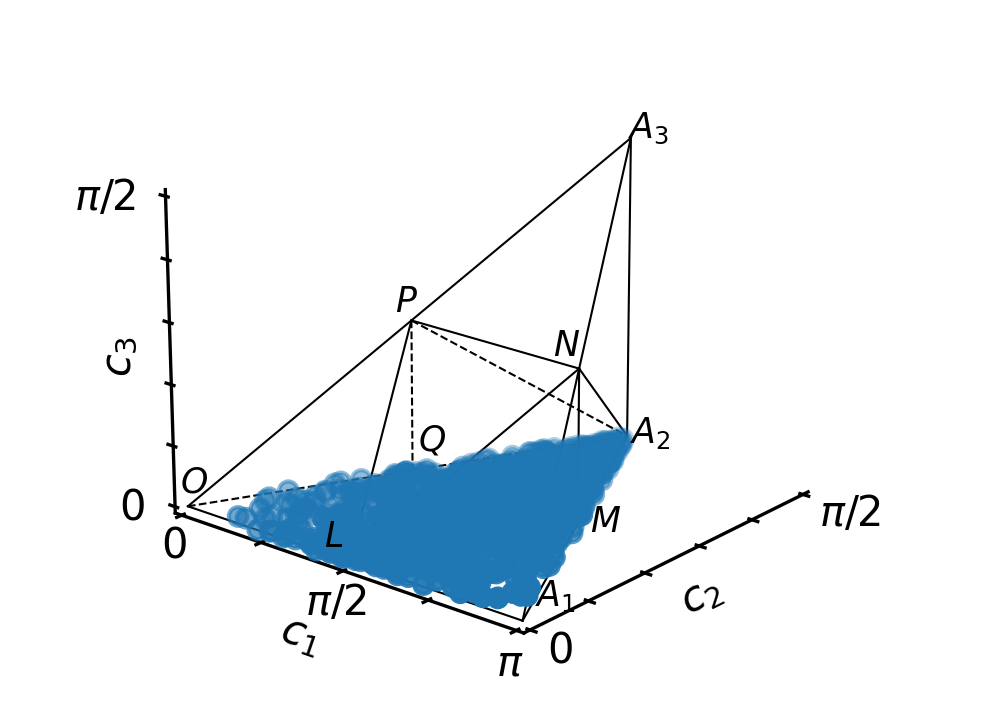

In [15]:
# visualize weyl chamber coordinates
from weylchamber import WeylChamber

w = WeylChamber()
N = 1000
for _ in range(N):
    qc = QuantumCircuit(2)
    # random 1q
    qc.u(
        2 * np.pi * np.random.rand(),
        2 * np.pi * np.random.rand(),
        2 * np.pi * np.random.rand(),
        0,
    )
    qc.u(
        2 * np.pi * np.random.rand(),
        2 * np.pi * np.random.rand(),
        2 * np.pi * np.random.rand(),
        1,
    )
    # qc.crz(2 * np.pi * np.random.rand(), 0, 1)
    qc.cx(0, 1)

    # random 1q
    qc.u(
        2 * np.pi * np.random.rand(),
        2 * np.pi * np.random.rand(),
        2 * np.pi * np.random.rand(),
        0,
    )
    qc.u(
        2 * np.pi * np.random.rand(),
        2 * np.pi * np.random.rand(),
        2 * np.pi * np.random.rand(),
        1,
    )
    # qc.swap(0, 1)
    # qc.cx(0, 1)
    qc.iswap(0, 1)

    # random 1q
    qc.u(
        2 * np.pi * np.random.rand(),
        2 * np.pi * np.random.rand(),
        2 * np.pi * np.random.rand(),
        0,
    )
    qc.u(
        2 * np.pi * np.random.rand(),
        2 * np.pi * np.random.rand(),
        2 * np.pi * np.random.rand(),
        1,
    )

    qc.swap(0, 1)
    op = Operator(qc).data
    w.add_point(*c1c2c3(op))
w.plot()

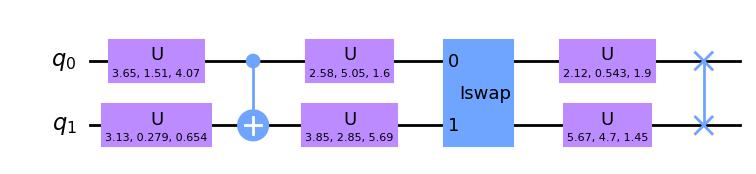

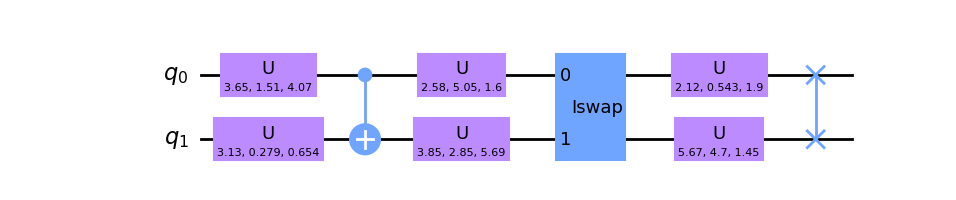

In [16]:
qc.draw("mpl")

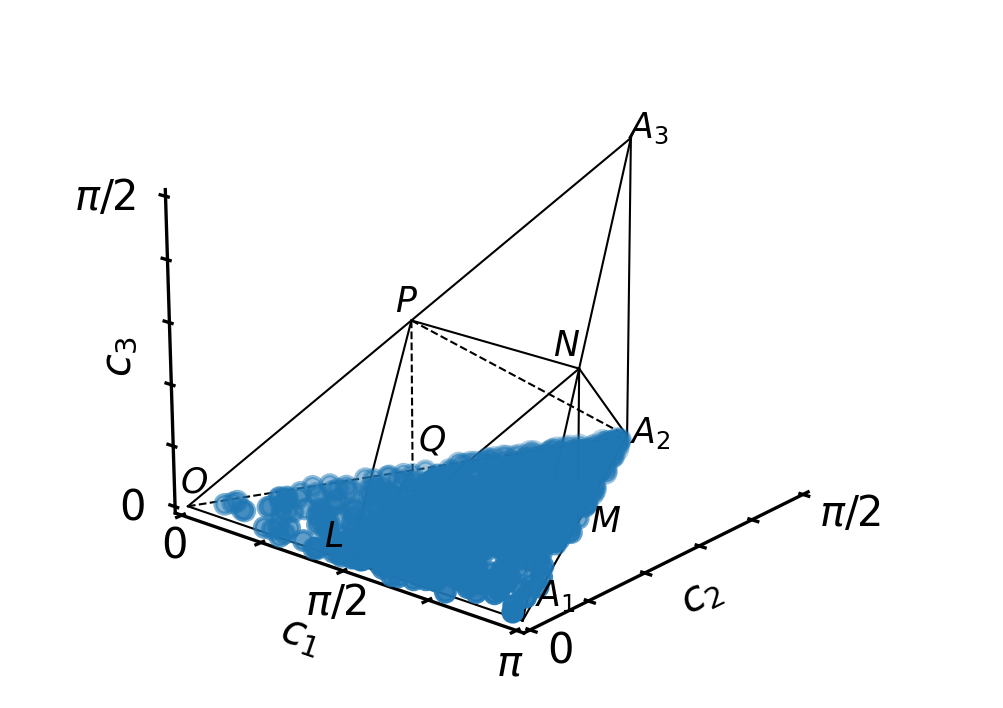

In [ ]:
# visualize weyl chamber coordinates
from qiskit import QuantumCircuit
from weylchamber import c1c2c3, WeylChamber
from qiskit.quantum_info import Operator
import numpy as np

w = WeylChamber()
N = 1000
for _ in range(N):
    qc = QuantumCircuit(2)
    # random 1q
    qc.u(
        2 * np.pi * np.random.rand(),
        2 * np.pi * np.random.rand(),
        2 * np.pi * np.random.rand(),
        0,
    )
    qc.u(
        2 * np.pi * np.random.rand(),
        2 * np.pi * np.random.rand(),
        2 * np.pi * np.random.rand(),
        1,
    )
    qc.cx(0, 1)

    # random 1q
    qc.u(
        2 * np.pi * np.random.rand(),
        2 * np.pi * np.random.rand(),
        2 * np.pi * np.random.rand(),
        0,
    )
    qc.u(
        2 * np.pi * np.random.rand(),
        2 * np.pi * np.random.rand(),
        2 * np.pi * np.random.rand(),
        1,
    )
    qc.iswap(0, 1)

    # random 1q
    qc.u(
        2 * np.pi * np.random.rand(),
        2 * np.pi * np.random.rand(),
        2 * np.pi * np.random.rand(),
        0,
    )
    qc.u(
        2 * np.pi * np.random.rand(),
        2 * np.pi * np.random.rand(),
        2 * np.pi * np.random.rand(),
        1,
    )
    qc.swap(0, 1)

    # random 1q
    qc.u(
        2 * np.pi * np.random.rand(),
        2 * np.pi * np.random.rand(),
        2 * np.pi * np.random.rand(),
        0,
    )
    qc.u(
        2 * np.pi * np.random.rand(),
        2 * np.pi * np.random.rand(),
        2 * np.pi * np.random.rand(),
        1,
    )
    op = Operator(qc).data
    w.add_point(*c1c2c3(op))
w.plot()

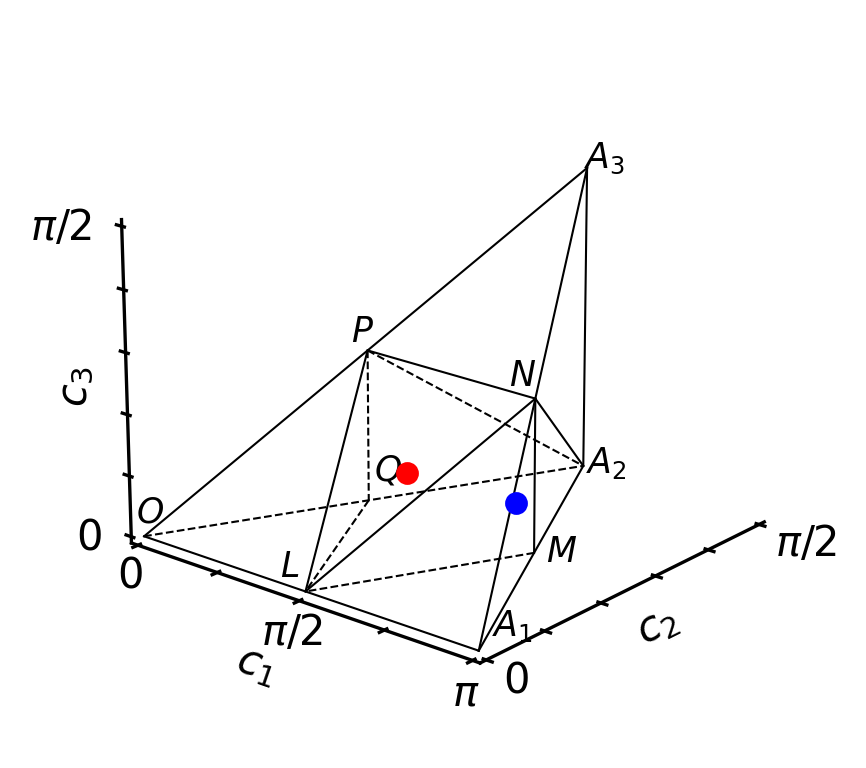

In [ ]:
w = WeylChamber()

# generate Haar random unitary
from qiskit.quantum_info import random_unitary

op = random_unitary(4).data
qc = QuantumCircuit(2)
qc.unitary(op, [0, 1])
op = Operator(qc).data
w.scatter(*c1c2c3(op), color="blue")
qc.swap(0, 1)
op2 = Operator(qc).data
w.scatter(*c1c2c3(op2), color="red")
w.plot()

In [ ]:
import numpy as np
from qiskit.quantum_info import random_unitary
from qiskit.quantum_info import Operator
from qiskit import QuantumCircuit
import matplotlib.pyplot as plt
from matplotlib import cm

w = WeylChamber()


# Generate many random unitaries
N = 1000
coords_initial = []
coords_final = []
for _ in range(N):
    # Generate Haar random unitary
    op = random_unitary(4).data
    qc = QuantumCircuit(2)
    qc.unitary(op, [0, 1])
    op = Operator(qc).data
    coords_initial.append(c1c2c3(op))

    # Apply SWAP
    qc.swap(0, 1)
    op2 = Operator(qc).data
    coords_final.append(c1c2c3(op2))

# Convert to numpy arrays for easier handling
coords_initial = np.array(coords_initial)
coords_final = np.array(coords_final)

# Plot initial points with blue color
w.scatter(
    coords_initial[:, 0], coords_initial[:, 1], coords_initial[:, 2], color="blue"
)

# Plot final points with red color
w.scatter(coords_final[:, 0], coords_final[:, 1], coords_final[:, 2], color="red")

import matplotlib as mpl

# Create a color map with 256 colors
color_map = mpl.cm.get_cmap("viridis", 256)

# Generate colors from the color map
colors = color_map(np.linspace(0, 1, N))

# Plot trajectories
for i in range(N):
    w._draw_line(
        (coords_initial[i, 0], coords_initial[i, 1], coords_initial[i, 2]),
        (coords_final[i, 0], coords_final[i, 1], coords_final[i, 2]),
        color=colors[i],
    )

/tmp/ipykernel_8214/1801803694.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = mpl.cm.get_cmap('viridis', 256)


TypeError: _draw_line() missing 1 required positional argument: 'end'

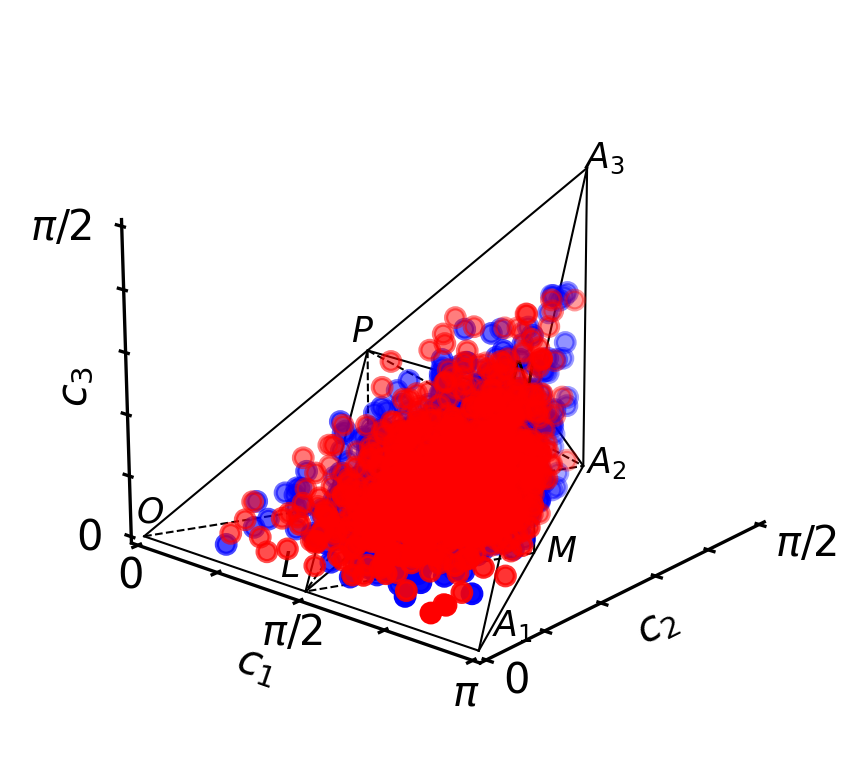

In [ ]:
w.plot()